# Spectrum xAI

In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

from src.data.dataset import DAGMDataset
from src.models.models import DenseNetClassifier
from src.models.train_model import train_model
from src.models.evaluation import evaluate_model
from src.task.gradcam import show_grad_cam
from src.task.gradient_shap import show_gradient_shap
from src.task.shapcam import show_shapcam

ImportError: cannot import name 'show_shapcam' from 'src.task.shapcam' (c:\Users\ismoi\Documents\Files\Etudes\CentraleSupélec\MSc_AI\Explainability of Artificial Intelligence\Project\Spectrum\src\task\shapcam.py)

## Data Loading

In [ ]:
CLASS = 1
IMAGE_PATH = f"data/dataset/Class{CLASS}/"

In [ ]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_dataset = DAGMDataset(root_dir=IMAGE_PATH, split="Train", transform=transform)
test_dataset = DAGMDataset(root_dir=IMAGE_PATH, split="Test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 575
Test dataset size: 575


## Model

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenseNetClassifier(pretrained=True, device=device)

criterion = torch.nn.BCEWithLogitsLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

### Training

In [ ]:
train_accuracies, train_losses = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=10)
model.save_model(f"data/models/densenet121_class{CLASS}.pt")

100%|██████████| 18/18 [00:25<00:00,  1.40s/it]


Epoch [1/10], Loss: 0.9089, Train Accuracy: 46.4348


100%|██████████| 18/18 [00:24<00:00,  1.36s/it]


Epoch [2/10], Loss: 0.7538, Train Accuracy: 94.0870


100%|██████████| 18/18 [00:24<00:00,  1.34s/it]


Epoch [3/10], Loss: 0.6701, Train Accuracy: 99.8261


100%|██████████| 18/18 [00:24<00:00,  1.35s/it]


Epoch [4/10], Loss: 0.6584, Train Accuracy: 99.8261


100%|██████████| 18/18 [00:24<00:00,  1.35s/it]


Epoch [5/10], Loss: 0.6508, Train Accuracy: 100.0000


100%|██████████| 18/18 [00:24<00:00,  1.35s/it]


Epoch [6/10], Loss: 0.6526, Train Accuracy: 99.4783


100%|██████████| 18/18 [00:24<00:00,  1.36s/it]


Epoch [7/10], Loss: 0.6513, Train Accuracy: 99.4783


100%|██████████| 18/18 [00:24<00:00,  1.38s/it]


Epoch [8/10], Loss: 0.6486, Train Accuracy: 99.8261


100%|██████████| 18/18 [00:25<00:00,  1.41s/it]


Epoch [9/10], Loss: 0.6474, Train Accuracy: 99.6522


100%|██████████| 18/18 [00:25<00:00,  1.44s/it]

Epoch [10/10], Loss: 0.6452, Train Accuracy: 100.0000


### Evaluation

In [3]:
model.load_model(f"data/models/model_densenet121_class{CLASS}.pth")
test_accuracy = evaluate_model(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

NameError: name 'CLASS' is not defined

## Explanation

True Label: 1


c:\Users\ismoi\anaconda3\envs\ai\Lib\site-packages\torch\nn\modules\module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


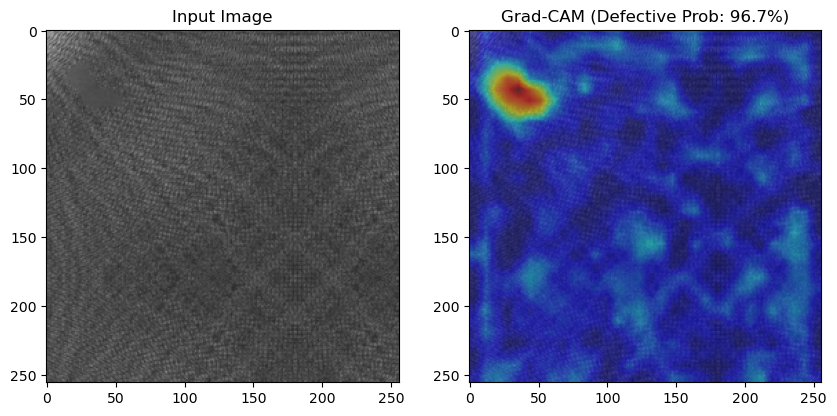

In [6]:
index = 1
image, label = test_dataset[index][0].unsqueeze(0), test_dataset[index][1]
print(f'True Label: {label}')
show_grad_cam(model.model, image, 6, device)

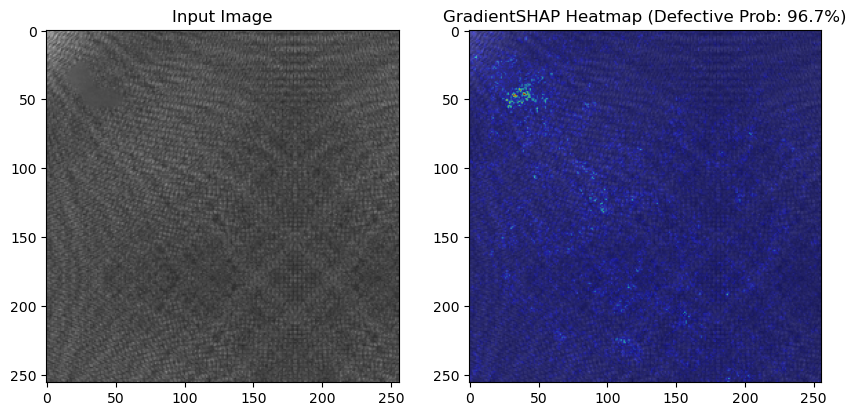

In [7]:
show_gradient_shap(model.model, image, device, num_samples=100)

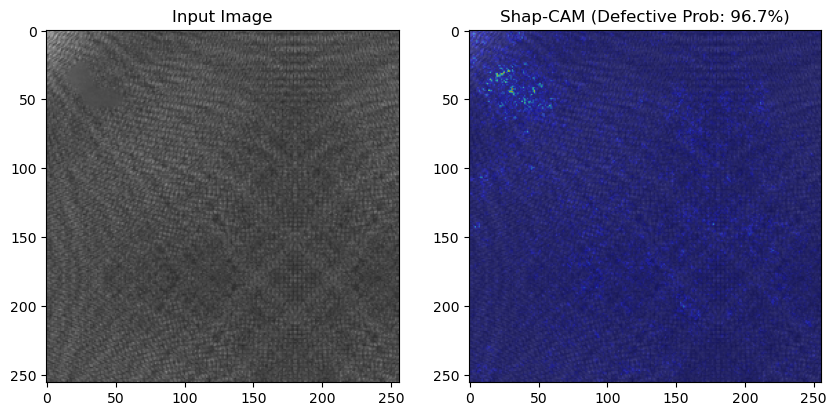

In [ ]:
show_shapcam(model.model, image, 6, device, num_samples=100)